# Analyzing the given Fashion Dataset for the period of October 2017

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("data.csv", skiprows=1, header=0)

In [4]:
df.head()

,0,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
0,1,2017-10-21 20:52:31,0,49.227.243.31,Kendrick,SE043SH31VBS,0,female,cc@braintree,1,YAY15,Kaitaia,NaN,1993-10-05 00:00:00,NZ,212.5
1,2,2017-10-21 20:55:12,0,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,1,male,pbi@afterpay,1,NaN,Shepparton,VIC,NaN,AU,526.36
2,3,2017-10-21 20:56:41,0,210.84.59.179,Classic Slides,SA849SH69SAK,1,female,cc@braintree,1,NaN,Essendon,VIC,NaN,AU,77.23
3,4,2017-10-21 20:59:27,0,59.167.79.119,Bonaire Flared Sleeve Tunic,SH045AA22AGR,0,female,pbi@afterpay,1,NaN,Karabar,NSW,NaN,AU,190.91
4,5,2017-10-21 21:00:56,0,1.129.107.188,Tall Tales Man Style Pants,MA146AA45RAK,0,female,cc@braintree,1,NaN,Mosman,NSW,NaN,AU,204.09


In [5]:
df.shape

(49999, 16)

In [6]:
df.isnull().sum()

0                         0
timestamp                 0
user ID                   0
ip_address                0
Product_Name              0
Product_ID                0
Is_First_Order            0
User_Gender            1174
Payment_Type              0
Number_of_Products        0
Order_Coupon_Code     38105
City                    337
Country_Province       4180
User_Birthday         27275
Country                   0
Revenue                   0
dtype: int64

### Cleaning Data

In [7]:
df[df.Number_of_Products=='undefined'].head()

,0,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
5052,5053,2017-10-05 00:50:56,4407,66.102.6.141,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
7324,7325,2017-10-09 09:37:51,6344,66.102.6.242,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
7821,7822,2017-10-20 02:09:48,6779,66.249.88.56,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
10450,10451,2017-10-19 00:18:09,9107,66.102.6.139,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
10940,10941,2017-10-06 02:59:02,9556,66.102.6.79,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined


In [8]:
print("Datapoints with undefined values:",df[df.Number_of_Products=='undefined'].shape[0])

Datapoints with undefined values: 15


---
Removing datapoints with 'undefined' values

In [9]:
df = df[df.Number_of_Products != 'undefined']

---
### 1.1. Overall: Finding total sales and revenue

In [10]:
no_of_products = df.Number_of_Products.str.split(",") 

In [11]:
sales = 0

for _ in no_of_products:
  for i in _:
    sales+=int(i)
sales

101332

In [12]:
df_revenue = pd.to_numeric(df.Revenue, downcast='float')

revenue = 0

for _ in df_revenue:
  revenue+=_
revenue


6699843.723126691

In [13]:
print("Total sales during the given period(i.e October 2017):",sales, ", that is 101.3K.")
print("Total revenue during the given period(i.e October 2017):"+"{:.2f}, that is 6.69M.".format(revenue))

Total sales during the given period(i.e October 2017): 101332 , that is 101.3K.
Total revenue during the given period(i.e October 2017):6699843.72, that is 6.69M.


---
### 1.2. Basket: Finding Avg. Unique Quantity and Revenue per order

In [14]:
product_revenue = df.drop(['0', 'timestamp', 'user ID', 'ip_address', 'Product_ID',
                                     'Is_First_Order', 'User_Gender', 'Payment_Type',
                                     'Number_of_Products','Order_Coupon_Code', 'City',
                                     'Country_Province', 'User_Birthday','Country'], axis=1)

In [15]:
product_revenue

,Product_Name,Revenue
0,Kendrick,212.5
1,Smartwatch Bradshaw Gold,526.36
2,Classic Slides,77.23
3,Bonaire Flared Sleeve Tunic,190.91
4,Tall Tales Man Style Pants,204.09
...,...,...
49994,Black Waistcoat,99.09
49995,Doritt,30.87
49996,Cocktail Draped Dress,236.36
49997,"Nike DF Epic Run Crop Tights,Cuban,Curve Singl...",257.19


In [16]:
products = product_revenue.Product_Name.str.split(",")

In [17]:
Product_count = []
for _ in products:
  Product_count.append(len(_))

product_revenue['Product_count'] = Product_count 

Avg_revenue = []
for _,i in zip(df_revenue,Product_count):
  Avg_revenue.append(round(_/i, 2))

product_revenue['Avg_revenue'] = Avg_revenue

product_revenue

,Product_Name,Revenue,Product_count,Avg_revenue
0,Kendrick,212.5,1,212.50
1,Smartwatch Bradshaw Gold,526.36,1,526.36
2,Classic Slides,77.23,1,77.23
3,Bonaire Flared Sleeve Tunic,190.91,1,190.91
4,Tall Tales Man Style Pants,204.09,1,204.09
...,...,...,...,...
49994,Black Waistcoat,99.09,1,99.09
49995,Doritt,30.87,1,30.87
49996,Cocktail Draped Dress,236.36,1,236.36
49997,"Nike DF Epic Run Crop Tights,Cuban,Curve Singl...",257.19,5,51.44


In [18]:
product_revenue.Product_count.value_counts()

1     26387
2     12295
3      5610
4      2666
5      1329
6       701
7       389
8       218
9       140
11       71
10       69
12       53
13       34
14       15
15        3
16        2
17        2
Name: Product_count, dtype: int64

In [19]:
product_revenue.Product_count.median()

1.0

In [20]:
 round(df_revenue.mean(), 2)

134.04

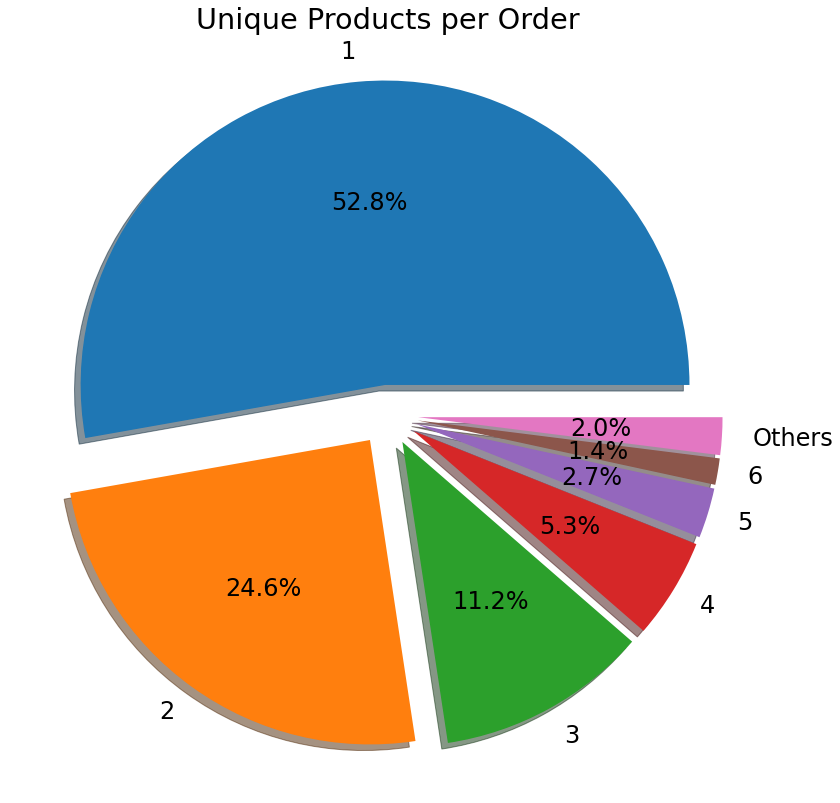

In [154]:
occurrences = [26387,12295,5610,2666,1329,701,996]

labels = [1, 2, 3, 4, 5, 6, 'Others']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)

fig = plt.figure(figsize =(20, 14)) 
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Unique Products per Order")
plt.savefig('Unique Products per Order.png')
plt.rcParams['font.size'] = 24
plt.show() 

- **Average unique quantity per order: 1**
- **Average revenue per order: 134.04**
- 52.80% orders contain only 1 product
- 24.60% orders contain 2 products
- **Maximum number of products in an order: 17**

---
### 1.3. Attributes: Time of Day, Day of Week, Geography, Payment Type

In [22]:
df_attributes = df.drop(['0', 'user ID', 'Is_First_Order','User_Gender','Order_Coupon_Code','User_Birthday'], axis=1)
df_attributes

,timestamp,ip_address,Product_Name,Product_ID,Payment_Type,Number_of_Products,City,Country_Province,Country,Revenue
0,2017-10-21 20:52:31,49.227.243.31,Kendrick,SE043SH31VBS,cc@braintree,1,Kaitaia,NaN,NZ,212.5
1,2017-10-21 20:55:12,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,pbi@afterpay,1,Shepparton,VIC,AU,526.36
2,2017-10-21 20:56:41,210.84.59.179,Classic Slides,SA849SH69SAK,cc@braintree,1,Essendon,VIC,AU,77.23
3,2017-10-21 20:59:27,59.167.79.119,Bonaire Flared Sleeve Tunic,SH045AA22AGR,pbi@afterpay,1,Karabar,NSW,AU,190.91
4,2017-10-21 21:00:56,1.129.107.188,Tall Tales Man Style Pants,MA146AA45RAK,cc@braintree,1,Mosman,NSW,AU,204.09
...,...,...,...,...,...,...,...,...,...,...
49994,2017-10-11 08:26:09,203.86.203.216,Black Waistcoat,JA108AA41NIK,cc@braintree,1,Broomfield,NaN,NZ,99.09
49995,2017-10-18 13:17:40,141.168.65.138,Doritt,TH164SH16NUX,pbi@afterpay,1,Mernda,VIC,AU,30.87
49996,2017-10-02 05:44:15,58.107.238.117,Cocktail Draped Dress,SH045AA34KEF,cc@braintree,1,Caringbah South,NSW,AU,236.36
49997,2017-10-15 20:28:28,202.67.68.182,"Nike DF Epic Run Crop Tights,Cuban,Curve Singl...","NI126SA99UZK,BI358SH35RMI,AS787AA14UBL,AM901AA...",cc@braintree,"1,1,1,1,1",Roseville,NSW,AU,257.19


---
Timestamp

In [23]:
from datetime import date
import calendar

In [24]:
df_attributes['timestamp'] = pd.to_datetime(df_attributes.timestamp)

In [25]:
df_attributes['Time of Day'] = df_attributes['timestamp'].dt.hour
df_attributes['Time of Day'].value_counts()

10    3609
9     3560
2     3436
3     3219
0     3205
23    3125
1     3110
5     2926
4     2914
8     2903
6     2715
22    2649
11    2642
7     2594
21    2007
12    1612
20    1223
13     806
19     535
14     460
15     241
18     221
16     142
17     130
Name: Time of Day, dtype: int64

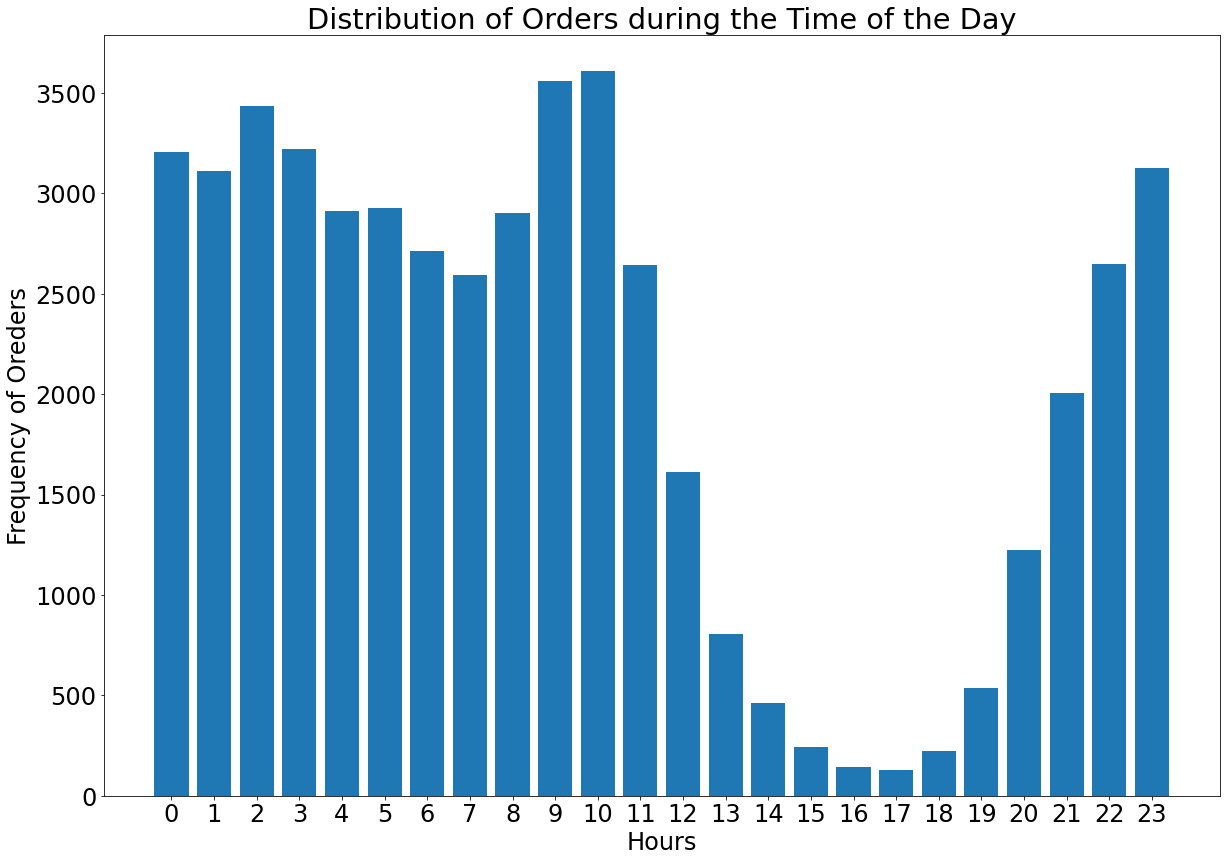

In [153]:
hours = [10,9,2,3,0,23,1,5,4,8,6,22,11,7,21,12,20,13,19,14,15,18,16,17,]
counts = [3609,3560,3436,3219,3205,3125,3110,2926,2914,2903,2715,2649,2642,2594,2007,1612,1223,806,535,460,
          241,221,142,130]


fig = plt.figure(figsize = (20, 14)) 
plt.bar(hours, counts)
plt.xlabel("Hours") 
plt.xticks(ticks=hours)
plt.ylabel("Frequency of Oreders") 
plt.title("Distribution of Orders during the Time of the Day")
plt.savefig('Distribution of Orders during the Time of the Day.png')
plt.rcParams['font.size'] = 24
plt.show()



- **Maximum sales happened during the day time**
  - At 9 hrs and 10 hrs most of the sales happened
- **Least sales happened during the evening time**
  - After 10 hrs, the sales dropped till 17hrs 
  - Least sales happened at 17 hrs

In [27]:
df_attributes['Day of Week'] = df_attributes['timestamp'].dt.day_name()

In [28]:
df_attributes['Day of Week'].value_counts()

Wednesday    9710
Tuesday      8988
Thursday     8279
Monday       7515
Sunday       5723
Friday       5457
Saturday     4312
Name: Day of Week, dtype: int64

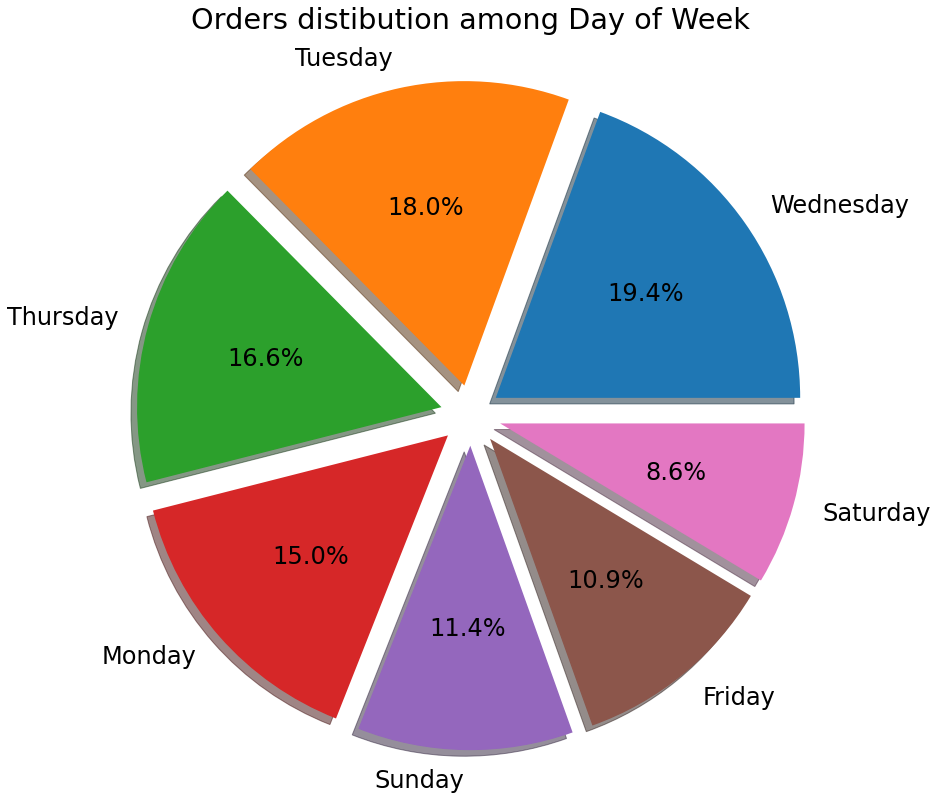

In [152]:
occurrences = [9710,8988,8279,7515,5723,5457,4312]

labels = ['Wednesday', 'Tuesday', 'Thursday', 'Monday','Sunday','Friday','Saturday']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)

fig = plt.figure(figsize =(20, 14)) 
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True )
plt.title("Orders distibution among Day of Week")
plt.savefig('Orders distibution among Day of Week.png')
plt.rcParams['font.size'] = 24
plt.show() 

- **Most sales happened on Wednesdays**
- **Least sales happened on Saturdays**

---
Geography

In [30]:
df_attributes.City.isnull().sum()

337

In [31]:
df_attributes.City.fillna("No City", inplace = True)

In [32]:
df_attributes.City.value_counts()

Sydney               1642
Auckland             1443
Melbourne             865
Surry Hills           370
No City               337
                     ... 
GEEBUNG                 1
Sydney University       1
Garfield                1
Innes Park              1
Rapid Creek             1
Name: City, Length: 5347, dtype: int64

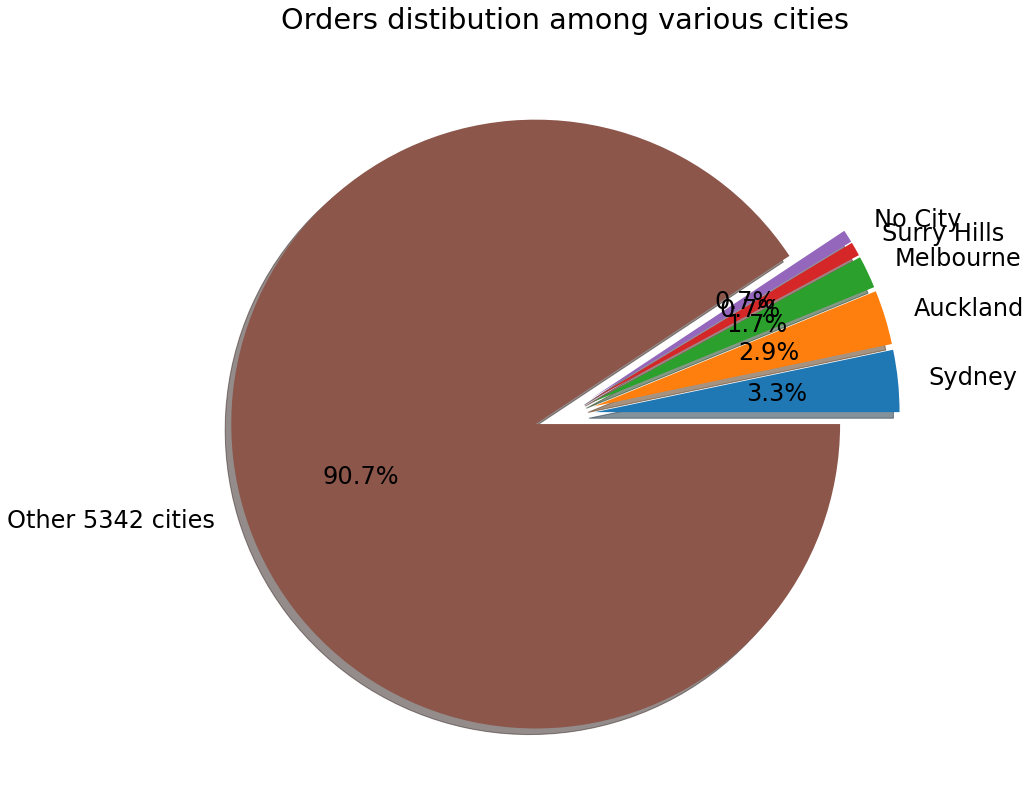

In [151]:
occurrences = [1642,1443,865,370,337,45327]

labels = ['Sydney', 'Auckland', 'Melbourne', 'Surry Hills','No City','Other 5342 cities']
explode = (0.1,0.1,0.1,0.1,0.1,0.1)

fig = plt.figure(figsize =(20, 14)) 
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True )
plt.title("Orders distibution among various cities")
plt.savefig('Orders distibution among various cities.png')
plt.rcParams['font.size'] = 24
plt.show() 

- All the orders are from: 5347 cities
- Of all the cities:
  - **Sydney has the highest number(1642) of orders**
  - **Auckland has the second highest number(1443) of orders**
  - Melbourne has the third highest number(865) of orders, and so on
  - **Other cities constitute: 90.7% of the total orders**
    - These cities have less than 100 orders each

In [34]:
df_attributes.Country.value_counts()

AU    47071
NZ     2913
Name: Country, dtype: int64

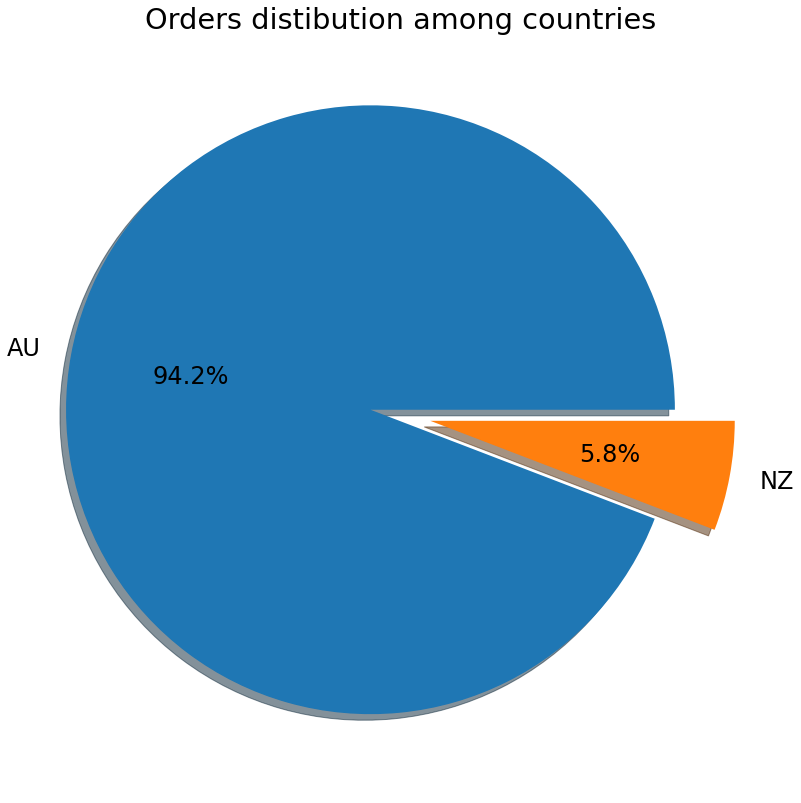

In [150]:
occurrences = [47071,2913]

labels = ['AU', 'NZ']
explode = (0.1,0.1)

fig = plt.figure(figsize =(20, 14)) 
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True )
plt.title("Orders distibution among countries")
plt.savefig('Orders distibution among countries.png')
plt.rcParams['font.size'] = 24
plt.show() 

- Australia constitute 94.2% of the total orders
- New Zealand constitute 5.8% of the total orders

---
Payment Type

In [36]:
df_attributes.Payment_Type.value_counts()

cc@braintree        23763
pbi@afterpay        13178
paypal@braintree    12059
NoPayment             984
Name: Payment_Type, dtype: int64

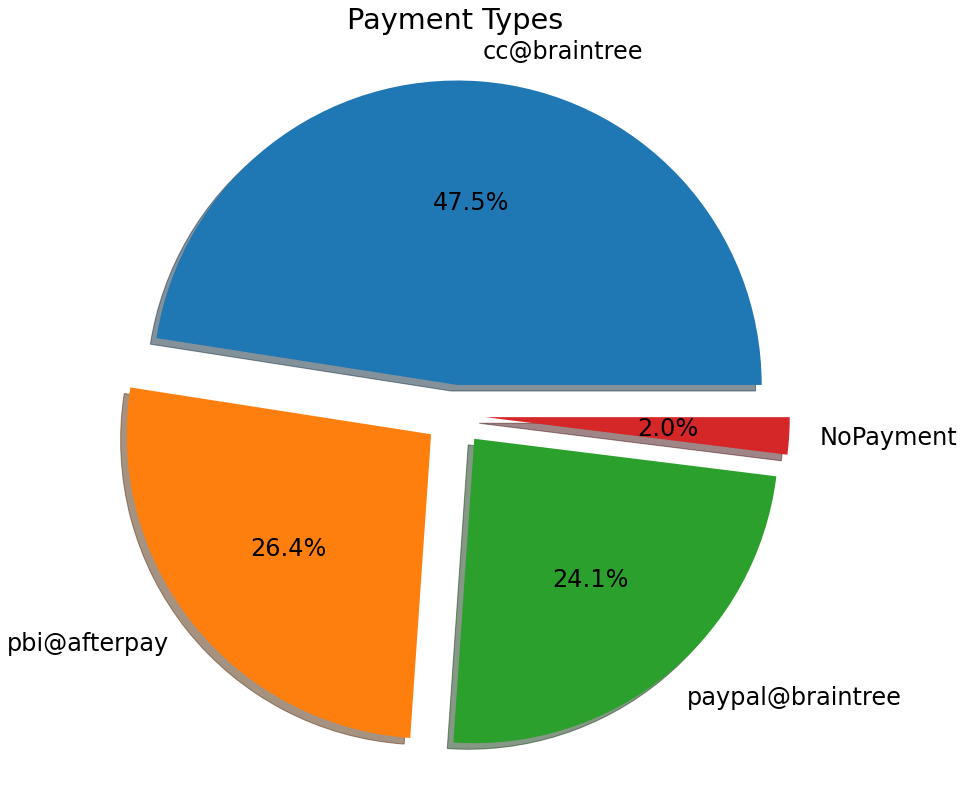

In [149]:
occurrences = [23763,13178,12059,984]

labels = ['cc@braintree', 'pbi@afterpay', 'paypal@braintree', 'NoPayment']
explode = (0.1,0.1,0.1,0.1)

fig = plt.figure(figsize =(20, 14)) 
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True )
plt.title("Payment Types")
plt.savefig('Payment Types.png')
plt.rcParams['font.size'] = 24
plt.show() 

- Most of the payments were made through **cc@braintree (47.5%)**
- For **2% of orders no payment** was made

---
### 1.4. Frequency: Finding Single Purchasers, Multiple purchasers and Frequency of Multi-Purchase

- Single Purchaser: User who purchased only once.
- Multiple Purchaser: User who purchased more than once.
- Frequency of Multi Purchase: Number of times multiple purchases occurred.

In [38]:
unique_ip = df.ip_address.value_counts()
unique_ip

49.255.235.25      202
210.5.112.34       104
180.232.79.218      40
108.171.134.165     39
203.11.225.5        35
                  ... 
118.210.131.145      1
58.107.253.13        1
211.26.28.47         1
101.166.160.113      1
114.75.80.155        1
Name: ip_address, Length: 41808, dtype: int64

In [39]:
df_ip = pd.DataFrame({'IP Address':unique_ip.index, 'Count':unique_ip.values})


In [40]:
df_ip.shape[0]

41808

In [41]:
df_ip

,IP Address,Count
0,49.255.235.25,202
1,210.5.112.34,104
2,180.232.79.218,40
3,108.171.134.165,39
4,203.11.225.5,35
...,...,...
41803,118.210.131.145,1
41804,58.107.253.13,1
41805,211.26.28.47,1
41806,101.166.160.113,1


In [42]:
df_multi_purchase = df_ip[df_ip['Count'] != 1]
df_multi_purchase

,IP Address,Count
0,49.255.235.25,202
1,210.5.112.34,104
2,180.232.79.218,40
3,108.171.134.165,39
4,203.11.225.5,35
...,...,...
4855,110.175.28.243,2
4856,210.50.84.91,2
4857,42.99.164.105,2
4858,121.210.39.131,2


In [43]:
print("Multi purchase users:",df_multi_purchase.shape[0])

Multi purchase users: 4860


---
Single Purchasers and Multiple Purchasers

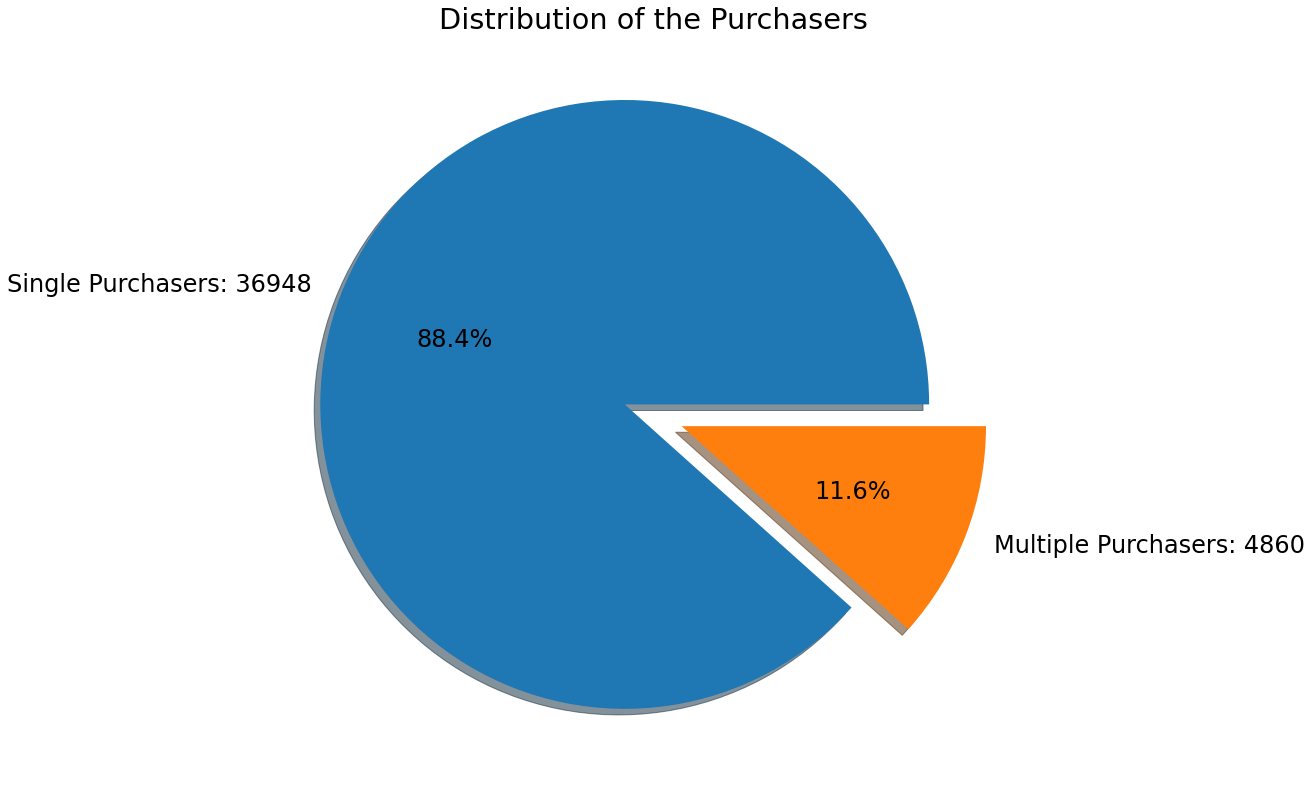

In [148]:
occurrences = [36948,4860]

labels = ['Single Purchasers: 36948', 'Multiple Purchasers: 4860']
explode = (0.1,0.1)

fig = plt.figure(figsize =(20, 14)) 
plt.pie(occurrences, labels = labels, autopct='%1.1f%%', explode=explode, shadow=True )
plt.title("Distribution of the Purchasers")
plt.savefig('Distribution of the Purchasers.png')
plt.rcParams['font.size'] = 24
plt.show() 

- We found unique users by considering unique IP addresses.
- There are 41808 unique users
- **Number of Single Purchasers: 36948 (88.37%)**
- **Number of Multiple Purchasers: 4860 (11.62%)**

Frequency of Multi-Purchase

In [45]:
df_multi_purchase["Count"].value_counts()

2      3605
3       703
4       256
5       104
6        51
7        31
8        28
9        14
10       14
12       10
11        9
13        8
15        4
14        4
16        3
22        2
24        2
104       1
23        1
20        1
40        1
34        1
19        1
26        1
21        1
202       1
35        1
18        1
39        1
Name: Count, dtype: int64

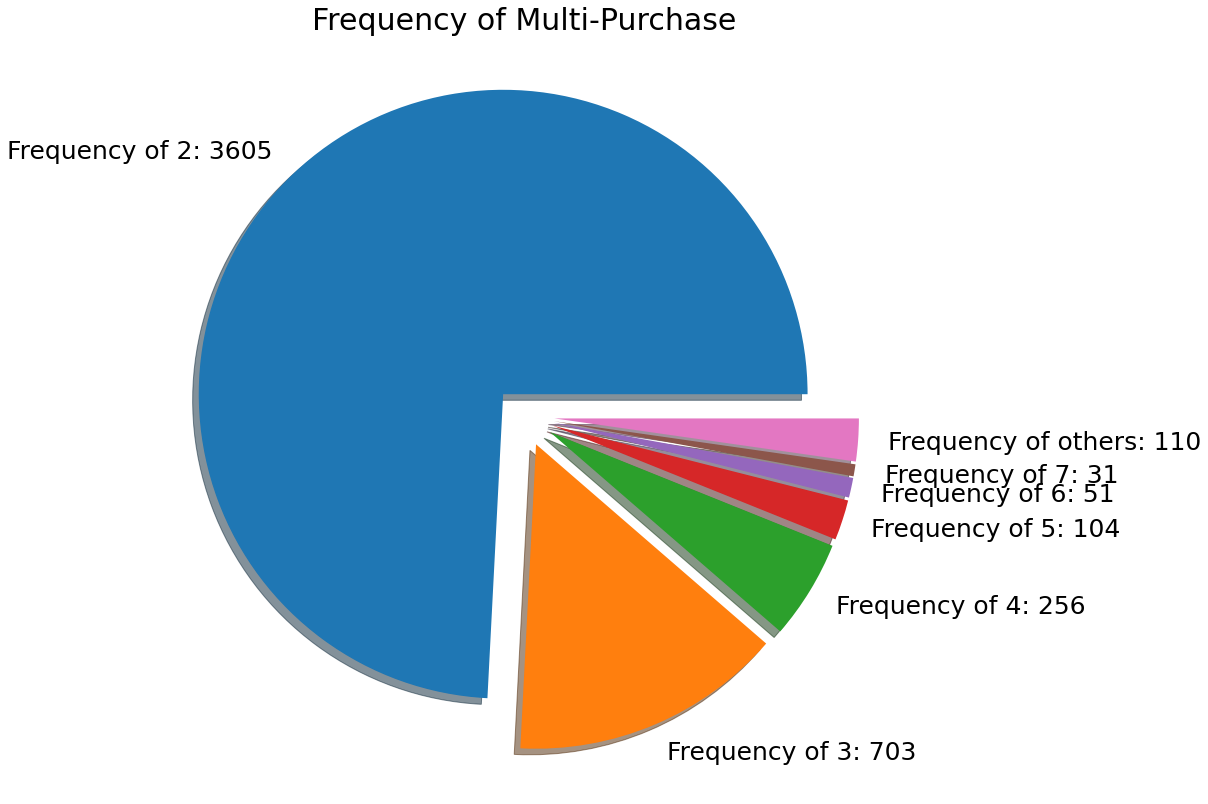

In [147]:
occurrences = [3605,703,256,104,51,31,110]

labels = ['Frequency of 2: 3605','Frequency of 3: 703','Frequency of 4: 256',
          'Frequency of 5: 104','Frequency of 6: 51','Frequency of 7: 31','Frequency of others: 110']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)

fig = plt.figure(figsize =(20, 14)) 
plt.pie(occurrences, labels = labels, explode=explode, shadow=True,)
plt.title("Frequency of Multi-Purchase")
plt.savefig('Frequency of Multi-Purchase.png')
plt.rcParams['font.size'] = 24
plt.show() 

- Frequency distribution of Multi Purchase shows that 8.62% users(3605 out of 41808) ordered twice and 1.62% users(703 out of 41808) ordered thrice
- **Only two users ordered more than 100 times**
  - 104 times, and
  - 202 times

---

### 2. Product Affinity

In [76]:
df_attributes.Product_Name

0                                                 Kendrick
1                                 Smartwatch Bradshaw Gold
2                                           Classic Slides
3                              Bonaire Flared Sleeve Tunic
4                               Tall Tales Man Style Pants
                               ...                        
49994                                      Black Waistcoat
49995                                               Doritt
49996                                Cocktail Draped Dress
49997    Nike DF Epic Run Crop Tights,Cuban,Curve Singl...
49998                              Cuban,Vivian Mini Dress
Name: Product_Name, Length: 49984, dtype: object

In [48]:
product_names = []

for _ in products:
  for i in _:
    product_names.append(i)

In [49]:
len(product_names)

97919

In [120]:
unique_products = set(product_names)
len(unique_products)

20029

In [ ]:

df_corr = {}

for _ in unique_products:
  for i in products:
    l = []
    if _ in i:
      l.append(i)
      df_corr.update({_:l})


In [87]:
df_corr = pd.DataFrame(df_corr)

In [88]:
df_corr

,Kendrick,Smartwatch Bradshaw Gold,Classic Slides,Bonaire Flared Sleeve Tunic,Tall Tales Man Style Pants,Stay Close Lace Mini Dress,Sorrento Stripe Roll Band Brief,SPF 50 Long Sleeve Rash Vest,Madera,Quatro,Authentic,Carnaby Evo - Women's,Original SWS,Ember Blooms High Neck Dress,Byron,Living Large,Amelia Block Heels,Back To Basics Leggings,Curve Singlet,High Rise Leggings,Clara Block Heels,Zenavia,Lacey,Tansy Top,Apple Blossom V-Neck Flute Top,Neka,Neon Weave Pocket Mini Dress,Women's Chuck Taylor All Star Dainty Ox,Hallie Off-Shoulder Dress,Viola Off Shoulder Dress,Bonnie Ruffle Dress,3 Pack Cushion No Show Socks,Django,Trefoil Tee Dress,Aria Frill Detail Top,Helen Blouse,Lovers,Tiered Pleated Skater Dress,Goldie Silk Dress,50's Boardwalk Dress,...,Home Alone Loose SS Sweat,Floral Front Wrap Dress,Santa Monica,Mens Bienville 44mm Leather Watch,Provence Tunic,Florale Pants,Florale Crop Top,Freshen Up Maxi,Dart Lyt,Macnee,Shelly Slim-Fit Beach Shorts,Men's Down Sweater Vest,Glen Vest,87 Cut-Out One-Piece,Chloe Shorts,Atwood,Hiuel,Cherry Lips Jumper,Fresh Foam Cruz - Men's,Mini Mikkeline Mini Satchel Ink,Energy Pullover,Culver Lace Up,Perforated Panel Hooded Jacket,574,Men's Compression 3/4 Tights,Marto Parka,Da,BALMORAL,FINCH,Coopers Shirt,Sentry SS,No Show Socks,Harlow Dobby Spot Playsuit,Hermione,SS Crew Tee,Lena Embellished Clutch,One-Shoulder Cape Cut-Away Gown,Spot Frill Flute Sleeve Top,Noosa Strappy Briefs,Black Waistcoat
0,"[Grandiose Chemise, Kendrick]",[Smartwatch Bradshaw Gold],"[Cherry Lace Dress, Jessa, Classic Slides, Div...",[Bonaire Flared Sleeve Tunic],[Tall Tales Man Style Pants],"[Star Crossed Lace Dress, Stay Close Lace Mini...","[Sorrento Stripe Roll Band Brief, SPF 50 Long...","[SPF 50 Long Sleeve Rash Vest, Short Sleeve M...",[Madera],"[Tailwind Fitted Midi Dress, Essential Cross B...","[Authentic, Cafe Racer]","[Kenley, Carnaby Evo - Women's, X_Plr - Unisex]",[Original SWS],"[Ember Blooms High Neck Dress, Hamilton Gold-T...",[Byron],"[Barbados, Festival, Gia, Living Large, Alyssa...","[Amelia Block Heels, Amelia Block Heels]","[Back To Basics Leggings, Honor Ripped Denim M...","[Nike DF Epic Run Crop Tights, Cuban, Curve Si...",[High Rise Leggings],"[Clara Block Heels, Arizona]",[Zenavia],[Lacey],"[Lucky Chance Earrings, Tansy Top, Sharp As]","[Palmette Boat Neck Tee, Boxy Fit Button-Up Sh...","[Neka, Yoko]",[Neon Weave Pocket Mini Dress],[Women's Chuck Taylor All Star Dainty Ox],"[Hallie Off-Shoulder Dress, Juliette Flutter D...","[Duddy Dress, Alessandra Lace Fit And Flare Dr...",[Bonnie Ruffle Dress],"[Solid Cotton Poplin Shirt, 3 Pack Cushion No ...",[Django],"[Shell Dress, Women's Sportswear Top, Cotton S...","[Aria Frill Detail Top, Accordion Blouse]",[Helen Blouse],"[Into Summer Skirt, Dahlia Cascade Skirt, Love...",[Tiered Pleated Skater Dress],[Goldie Silk Dress],"[50's Boardwalk Dress , Summer Wide Brim Flopp...",...,"[Viveka Jumper, Home Alone Loose SS Sweat]","[Floral Print Dress, Printed Cap Sleeve Wrap T...","[AVENUE LS STRIPE, Santa Monica]",[Mens Bienville 44mm Leather Watch],"[Sienna Off-Shoulder Tee, Provence Tunic]","[Florale Pants, Florale Crop Top]","[Florale Pants, Florale Crop Top]","[Freshen Up Maxi, Ellen Linen Dress, Peru Dress]","[Asher, Tillie Tie-Up Long Sleeve Top, Dart Ly...","[Macnee, LA Kings Washed Cotton Strapback]",[Shelly Slim-Fit Beach Shorts],"[Men's Down Sweater Vest, Basic Zip Through Ho...","[Men's Down Sweater Vest, Basic Zip Through Ho...","[Thalia, 87 Cut-Out One-Piece]","[Chloe Shorts, Calvin Klein Jeans Cap, A400 Wo...","[Atwood, 003 Jeans , Crew Neck Tee, Palermo, H...","[Atwood, 003 Jeans , Crew Neck Tee, Palermo, H...",[Cherry Lips Jumper],"[3 Pack Sneaker Plain Socks, Fresh Foam Cruz -...","[Mini Mikkeline Mini Satchel Ink, Force of Being]","[Distressed Sweatshirt, Energy Pullover]",[Culver Lace Up],"[Logo Gathered Hem Tee, Perforated Panel Hoode...","[574, Absolute Tights]","[Origin Tee, Men's Compression 3/4 Tights, LS ...","[Marto Parka, ADC Fleece C

In [111]:
result = df_corr.transpose()  

result['Product_name'] = result.index
result.reset_index(drop=True, inplace=True)
result.columns = ['Bought_together', 'Product_name']
result = result[['Product_name', 'Bought_together']]
result.head(20)

,Product_name,Bought_together
0,Kendrick,"[Grandiose Chemise, Kendrick]"
1,Smartwatch Bradshaw Gold,[Smartwatch Bradshaw Gold]
2,Classic Slides,"[Cherry Lace Dress, Jessa, Classic Slides, Div..."
3,Bonaire Flared Sleeve Tunic,[Bonaire Flared Sleeve Tunic]
4,Tall Tales Man Style Pants,[Tall Tales Man Style Pants]
5,Stay Close Lace Mini Dress,"[Star Crossed Lace Dress, Stay Close Lace Mini..."
6,Sorrento Stripe Roll Band Brief,"[Sorrento Stripe Roll Band Brief, SPF 50 Long..."
7,SPF 50 Long Sleeve Rash Vest,"[SPF 50 Long Sleeve Rash Vest, Short Sleeve M..."
8,Madera,[Madera]
9,Quatro,"[Tailwind Fitted Midi Dress, Essential Cross B..."


In [ ]:
lengths = []

for _ in result.Bought_together:
  lengths.append(len(_))
 

In [116]:
result['Count'] = lengths
result.head(10)

,Product_name,Bought_together,Count
0,Kendrick,"[Grandiose Chemise, Kendrick]",2
1,Smartwatch Bradshaw Gold,[Smartwatch Bradshaw Gold],1
2,Classic Slides,"[Cherry Lace Dress, Jessa, Classic Slides, Div...",5
3,Bonaire Flared Sleeve Tunic,[Bonaire Flared Sleeve Tunic],1
4,Tall Tales Man Style Pants,[Tall Tales Man Style Pants],1
5,Stay Close Lace Mini Dress,"[Star Crossed Lace Dress, Stay Close Lace Mini...",2
6,Sorrento Stripe Roll Band Brief,"[Sorrento Stripe Roll Band Brief, SPF 50 Long...",2
7,SPF 50 Long Sleeve Rash Vest,"[SPF 50 Long Sleeve Rash Vest, Short Sleeve M...",3
8,Madera,[Madera],1
9,Quatro,"[Tailwind Fitted Midi Dress, Essential Cross B...",8


In [117]:
result.Count.value_counts()

1     5991
2     4832
3     3249
4     1969
5     1355
6      811
7      498
8      317
9      257
11     178
12     168
10     168
13     144
14      65
17      14
16       7
15       6
Name: Count, dtype: int64

In [134]:
df_sell_together = result[result['Count']==2]
df_sell_together.tail(10)

,Product_name,Bought_together,Count
19991,Santa Monica,"[AVENUE LS STRIPE, Santa Monica]",2
19993,Provence Tunic,"[Sienna Off-Shoulder Tee, Provence Tunic]",2
19994,Florale Pants,"[Florale Pants, Florale Crop Top]",2
19995,Florale Crop Top,"[Florale Pants, Florale Crop Top]",2
19998,Macnee,"[Macnee, LA Kings Washed Cotton Strapback]",2
20002,87 Cut-Out One-Piece,"[Thalia, 87 Cut-Out One-Piece]",2
20008,Mini Mikkeline Mini Satchel Ink,"[Mini Mikkeline Mini Satchel Ink, Force of Being]",2
20009,Energy Pullover,"[Distressed Sweatshirt, Energy Pullover]",2
20012,574,"[574, Absolute Tights]",2
20027,Noosa Strappy Briefs,"[Noosa Strappy Briefs, Salsa Dress]",2


---
- There are 20029 unique products
- Of these unique products, **5991 products(30%) are sold alone**.
- Some of the items more likely to be sold together are:
  - Distressed Sweatshirt and Energy Pullover
  - Florale Pants and Florale Crop Top
  - Noosa Strappy Briefs and Salsa Dress
  - And many more.

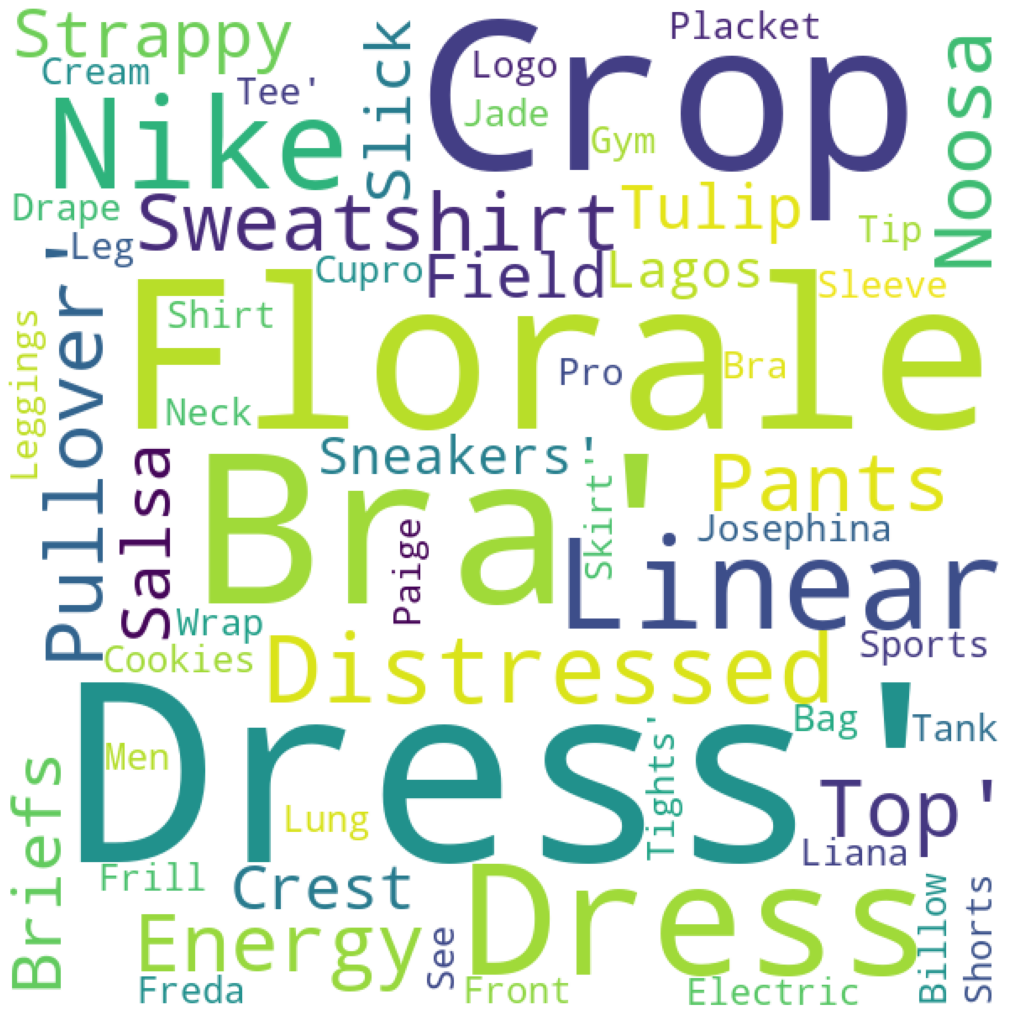

In [155]:

from wordcloud import WordCloud, STOPWORDS 

list_sell_together = ['Distressed Sweatshirt and Energy Pullover','Florale Pants and Florale Crop Top',
                      'Noosa Strappy Briefs and Salsa Dress', 'Tulip Field Crop and Crest Bra',
                      'Slick and Lagos Sneakers','Josephina Dress and Billow Wrap Dress',
                      'Tip Placket Shirt and Freda Frill Sleeve Tee','Jade Bra and Electric Sports Bra',
                      'Lung Drape V-Neck Dress and Paige Dress',
                      'Liana Cupro Front Tank and Cookies And Cream Skirt',
                      'Linear Gym Bag and Men\'s Nike Pro Shorts',
                      'Linear Leggings and Nike Leg-A-See Logo Tights']

wordcloud = WordCloud(width = 600, height = 600, 
				background_color ='white',
				min_font_size = 10).generate(str(list_sell_together)) 

# plot the WordCloud image					 
plt.figure(figsize = (20, 14), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('Products_sell_together.png')
plt.show() 
